Projeto Machine Learning

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import re

In [2]:
coronaVirusData = pd.read_csv('/Users/viniciussouza/Machine Learning/Covid19-ML/covid_19_data.csv', parse_dates=['ObservationDate', 'Last Update'])
coronaVirusData

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [3]:
coronaVirusData.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [4]:
# Renomeando as colunas
"""
tudo que tiver no espaco ou com / ele vai substituir por nada
"""
def corrigirColunas(colName):
    return re.sub(r"[/| ]", "", colName).lower()


In [5]:
# Corrigir colunas do dataframe:
coronaVirusData.columns = [corrigirColunas(col) for col in coronaVirusData.columns]
coronaVirusData

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


# Brazil

## selecionar apenas os dados do Brazil

In [6]:
coronaBrazil = coronaVirusData.loc[(coronaVirusData.countryregion == 'Brazil') & (coronaVirusData.confirmed > 0)]
coronaBrazil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


# Evolução
### Grafico de casos confirmados

In [7]:
px.line(
    coronaBrazil,
    x='observationdate',
    y='confirmed',
    title='Casos confirmados de COVID-19 no Brasil'
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'observationdate=%{x}<br>confirmed=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 2, 26, 0, 0),
                          datetime.datetime(2020, 2, 27, 0, 0),
                          datetime.datetime(2020, 2, 28, 0, 0),
                          datetime.datetime(2020, 2, 29, 0, 0),
                          datetime.datetime(2020, 3, 1, 0, 0),
                          datetime.datetime(2020, 3, 2, 0, 0),
                          datetime.datetime(2020, 3, 3, 0, 0),
                          datetime.datetime(2020, 3, 4, 0, 0),
                          datetime.datetime(2020, 3, 5, 0, 0),
                          datetime.datetime(2020, 3, 6, 0, 0),
                          datetime.datetime(2020, 3, 7, 0, 0),
                          datetime.datetime(2020, 3, 8, 0, 0),
                          datetime.datetime(2020, 3, 9, 0, 0),
                          datetime.datetime(2020, 3, 10, 0, 0),
                          datetime.datetime(2020, 3, 11, 0, 0),
                          datetime.datetime(2020, 3, 12, 0, 0),
                          datetime.datetime(2020, 3, 13, 0, 0),
                          datetime.datetime(2020, 3, 14, 0, 0),
                          datetime.datetime(2020, 3, 15, 0, 0),
                          datetime.datetime(2020, 3, 16, 0, 0),
                          datetime.datetime(2020, 3, 17, 0, 0),
                          datetime.datetime(2020, 3, 18, 0, 0),
                          datetime.datetime(2020, 3, 19, 0, 0),
                          datetime.datetime(2020, 3, 20, 0, 0),
                          datetime.datetime(2020, 3, 21, 0, 0),
                          datetime.datetime(2020, 3, 22, 0, 0),
                          datetime.datetime(2020, 3, 23, 0, 0),
                          datetime.datetime(2020, 3, 24, 0, 0),
                          datetime.datetime(2020, 3, 25, 0, 0),
                          datetime.datetime(2020, 3, 26, 0, 0),
                          datetime.datetime(2020, 3, 27, 0, 0),
                          datetime.datetime(2020, 3, 28, 0, 0),
                          datetime.datetime(2020, 3, 29, 0, 0),
                          datetime.datetime(2020, 3, 30, 0, 0),
                          datetime.datetime(2020, 3, 31, 0, 0),
                          datetime.datetime(2020, 4, 1, 0, 0),
                          datetime.datetime(2020, 4, 2, 0, 0),
                          datetime.datetime(2020, 4, 3, 0, 0),
                          datetime.datetime(2020, 4, 4, 0, 0),
                          datetime.datetime(2020, 4, 5, 0, 0),
                          datetime.datetime(2020, 4, 6, 0, 0),
                          datetime.datetime(2020, 4, 7, 0, 0),
                          datetime.datetime(2020, 4, 8, 0, 0),
                          datetime.datetime(2020, 4, 9, 0, 0),
                          datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0),
                          datetime.datetime(2020, 4, 13, 0, 0),
                          datetime.datetime(2020, 4, 14, 0, 0),
                          datetime.datetime(2020, 4, 15, 0, 0),
                          datetime.datetime(2020, 4, 16, 0, 0),
                          datetime.datetime(2020, 4, 17, 0, 0),
                          datetime.datetime(2020, 4, 18, 0, 0),
                          datetime.datetime(2020, 4, 19, 0, 0),
                          datetime.datetime(2020, 4, 20, 0, 0),
                          datetime.datetime(2020, 4, 21, 0, 0),
                          datetime.dat

In [8]:
# criar uma nova coluna para identificar os novos casos por dia

coronaBrazil["novoscasos"] = list(
    map(
        lambda x: 0 if (x == 0) else coronaBrazil["confirmed"].iloc[x] - coronaBrazil["confirmed"].iloc[x-1],
        np.arange(coronaBrazil.shape[0])
    )
)

/var/folders/h0/9cxt3flx6px_mz8j5myq3cjw0000gn/T/ipykernel_97134/3296585475.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
px.line(
    coronaBrazil,
    x='observationdate',
    y='novoscasos',
    title='Novos casos de COVID-19 no Brasil'
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'observationdate=%{x}<br>novoscasos=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 2, 26, 0, 0),
                          datetime.datetime(2020, 2, 27, 0, 0),
                          datetime.datetime(2020, 2, 28, 0, 0),
                          datetime.datetime(2020, 2, 29, 0, 0),
                          datetime.datetime(2020, 3, 1, 0, 0),
                          datetime.datetime(2020, 3, 2, 0, 0),
                          datetime.datetime(2020, 3, 3, 0, 0),
                          datetime.datetime(2020, 3, 4, 0, 0),
                          datetime.datetime(2020, 3, 5, 0, 0),
                          datetime.datetime(2020, 3, 6, 0, 0),
                          datetime.datetime(2020, 3, 7, 0, 0),
                          datetime.datetime(2020, 3, 8, 0, 0),
                          datetime.datetime(2020, 3, 9, 0, 0),
                          datetime.datetime(2020, 3, 10, 0, 0),
                          datetime.datetime(2020, 3, 11, 0, 0),
                          datetime.datetime(2020, 3, 12, 0, 0),
                          datetime.datetime(2020, 3, 13, 0, 0),
                          datetime.datetime(2020, 3, 14, 0, 0),
                          datetime.datetime(2020, 3, 15, 0, 0),
                          datetime.datetime(2020, 3, 16, 0, 0),
                          datetime.datetime(2020, 3, 17, 0, 0),
                          datetime.datetime(2020, 3, 18, 0, 0),
                          datetime.datetime(2020, 3, 19, 0, 0),
                          datetime.datetime(2020, 3, 20, 0, 0),
                          datetime.datetime(2020, 3, 21, 0, 0),
                          datetime.datetime(2020, 3, 22, 0, 0),
                          datetime.datetime(2020, 3, 23, 0, 0),
                          datetime.datetime(2020, 3, 24, 0, 0),
                          datetime.datetime(2020, 3, 25, 0, 0),
                          datetime.datetime(2020, 3, 26, 0, 0),
                          datetime.datetime(2020, 3, 27, 0, 0),
                          datetime.datetime(2020, 3, 28, 0, 0),
                          datetime.datetime(2020, 3, 29, 0, 0),
                          datetime.datetime(2020, 3, 30, 0, 0),
                          datetime.datetime(2020, 3, 31, 0, 0),
                          datetime.datetime(2020, 4, 1, 0, 0),
                          datetime.datetime(2020, 4, 2, 0, 0),
                          datetime.datetime(2020, 4, 3, 0, 0),
                          datetime.datetime(2020, 4, 4, 0, 0),
                          datetime.datetime(2020, 4, 5, 0, 0),
                          datetime.datetime(2020, 4, 6, 0, 0),
                          datetime.datetime(2020, 4, 7, 0, 0),
                          datetime.datetime(2020, 4, 8, 0, 0),
                          datetime.datetime(2020, 4, 9, 0, 0),
                          datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0),
                          datetime.datetime(2020, 4, 13, 0, 0),
                          datetime.datetime(2020, 4, 14, 0, 0),
                          datetime.datetime(2020, 4, 15, 0, 0),
                          datetime.datetime(2020, 4, 16, 0, 0),
                          datetime.datetime(2020, 4, 17, 0, 0),
                          datetime.datetime(2020, 4, 18, 0, 0),
                          datetime.datetime(2020, 4, 19, 0, 0),
                          datetime.datetime(2020, 4, 20, 0, 0),
                          datetime.datetime(2020, 4, 21, 0, 0),
                          datetime.da

# Mortes Brazil

In [10]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=coronaBrazil.observationdate,
        y=coronaBrazil.deaths,
        mode='lines+markers',
        name='Mortes',
        line=dict(
            color='red'
        )
    )
)

fig.update_layout(title='Mortes por COVID-19 no Brasil')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'red'},
              'mode': 'lines+markers',
              'name': 'Mortes',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 2, 26, 0, 0),
                          datetime.datetime(2020, 2, 27, 0, 0),
                          datetime.datetime(2020, 2, 28, 0, 0),
                          datetime.datetime(2020, 2, 29, 0, 0),
                          datetime.datetime(2020, 3, 1, 0, 0),
                          datetime.datetime(2020, 3, 2, 0, 0),
                          datetime.datetime(2020, 3, 3, 0, 0),
                          datetime.datetime(2020, 3, 4, 0, 0),
                          datetime.datetime(2020, 3, 5, 0, 0),
                          datetime.datetime(2020, 3, 6, 0, 0),
                          datetime.datetime(2020, 3, 7, 0, 0),
                          datetime.datetime(2020, 3, 8, 0, 0),
                          datetime.datetime(2020, 3, 9, 0, 0),
                          datetime.datetime(2020, 3, 10, 0, 0),
                          datetime.datetime(2020, 3, 11, 0, 0),
                          datetime.datetime(2020, 3, 12, 0, 0),
                          datetime.datetime(2020, 3, 13, 0, 0),
                          datetime.datetime(2020, 3, 14, 0, 0),
                          datetime.datetime(2020, 3, 15, 0, 0),
                          datetime.datetime(2020, 3, 16, 0, 0),
                          datetime.datetime(2020, 3, 17, 0, 0),
                          datetime.datetime(2020, 3, 18, 0, 0),
                          datetime.datetime(2020, 3, 19, 0, 0),
                          datetime.datetime(2020, 3, 20, 0, 0),
                          datetime.datetime(2020, 3, 21, 0, 0),
                          datetime.datetime(2020, 3, 22, 0, 0),
                          datetime.datetime(2020, 3, 23, 0, 0),
                          datetime.datetime(2020, 3, 24, 0, 0),
                          datetime.datetime(2020, 3, 25, 0, 0),
                          datetime.datetime(2020, 3, 26, 0, 0),
                          datetime.datetime(2020, 3, 27, 0, 0),
                          datetime.datetime(2020, 3, 28, 0, 0),
                          datetime.datetime(2020, 3, 29, 0, 0),
                          datetime.datetime(2020, 3, 30, 0, 0),
                          datetime.datetime(2020, 3, 31, 0, 0),
                          datetime.datetime(2020, 4, 1, 0, 0),
                          datetime.datetime(2020, 4, 2, 0, 0),
                          datetime.datetime(2020, 4, 3, 0, 0),
                          datetime.datetime(2020, 4, 4, 0, 0),
                          datetime.datetime(2020, 4, 5, 0, 0),
                          datetime.datetime(2020, 4, 6, 0, 0),
                          datetime.datetime(2020, 4, 7, 0, 0),
                          datetime.datetime(2020, 4, 8, 0, 0),
                          datetime.datetime(2020, 4, 9, 0, 0),
                          datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0),
                          datetime.datetime(2020, 4, 13, 0, 0),
                          datetime.datetime(2020, 4, 14, 0, 0),
                          datetime.datetime(2020, 4, 15, 0, 0),
                          datetime.datetime(2020, 4, 16, 0, 0),
                          datetime.datetime(2020, 4, 17, 0, 0),
                          datetime.datetime(2020, 4, 18, 0, 0),
                          datetime.datetime(2020, 4, 19, 0, 0),
                          datetime.datetime(2020, 4, 20, 0, 0),
                          datetime.datetime(2020, 4, 21, 0, 0),
                          datetime.datetime(2020, 4, 22, 0, 0),
                          datetime.datetime(2020, 4, 23, 0, 0),
                          datetime.datetime(2020, 4, 24, 0, 0),
                          datetime.datetime(2020, 4, 25, 0, 0),
                         

# Taxa de Crescimento

### Calculo é: taxaCrescimento = (presente/passado)**(1/n)-1
- n -> Numero de dias

In [11]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    """
    data -> DataFrame
    variable -> str
    data_inicio -> Data inicio da análise
    data_fim -> Data fim da análise
    """

    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    
    else:
        data_inicio = pd.to_datetime(data_inicio)

    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]

    else:
        data_fim = pd.to_datetime(data_fim)

    # Filtrar as datas
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]

    # Numero de dias entre as datas
    n = (data_fim - data_inicio).days

    # Calculo da taxa de crescimento
    taxa = (presente/passado)**(1/n) - 1

    return (taxa * 100).round(2)

In [12]:
# Calculando a taxa de crescimento
taxa_crescimento(coronaBrazil, 'confirmed')

np.float64(16.27)

### Taxa de crescimento diário

In [13]:
def taxa_crescimento_diario(data, variable, data_inicio=None):
    """
    data -> DataFrame
    variable -> str
    data_inicio -> Data inicio da análise
    """

    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    
    else:
        data_inicio = pd.to_datetime(data_inicio)

    data_fim = data.observationdate.max()

    n = (data_fim - data_inicio).days

    taxa = list(
        map(
            lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
            range(1, n+1)
        )
    )

    return np.array(taxa) * 100

In [14]:
tx_dia = taxa_crescimento_diario(coronaBrazil, 'confirmed')
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [15]:
primeiro_dia = coronaBrazil.observationdate.loc[coronaBrazil.confirmed > 0].min()
ultimo_dia = coronaBrazil.observationdate.max()

px.line(
    x=pd.date_range(primeiro_dia, ultimo_dia)[1:],
    y=tx_dia,
    title='Taxa de crescimento de casos confirmados de COVID-19 no Brasil'
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 2, 27, 0, 0),
                          datetime.datetime(2020, 2, 28, 0, 0),
                          datetime.datetime(2020, 2, 29, 0, 0),
                          datetime.datetime(2020, 3, 1, 0, 0),
                          datetime.datetime(2020, 3, 2, 0, 0),
                          datetime.datetime(2020, 3, 3, 0, 0),
                          datetime.datetime(2020, 3, 4, 0, 0),
                          datetime.datetime(2020, 3, 5, 0, 0),
                          datetime.datetime(2020, 3, 6, 0, 0),
                          datetime.datetime(2020, 3, 7, 0, 0),
                          datetime.datetime(2020, 3, 8, 0, 0),
                          datetime.datetime(2020, 3, 9, 0, 0),
                          datetime.datetime(2020, 3, 10, 0, 0),
                          datetime.datetime(2020, 3, 11, 0, 0),
                          datetime.datetime(2020, 3, 12, 0, 0),
                          datetime.datetime(2020, 3, 13, 0, 0),
                          datetime.datetime(2020, 3, 14, 0, 0),
                          datetime.datetime(2020, 3, 15, 0, 0),
                          datetime.datetime(2020, 3, 16, 0, 0),
                          datetime.datetime(2020, 3, 17, 0, 0),
                          datetime.datetime(2020, 3, 18, 0, 0),
                          datetime.datetime(2020, 3, 19, 0, 0),
                          datetime.datetime(2020, 3, 20, 0, 0),
                          datetime.datetime(2020, 3, 21, 0, 0),
                          datetime.datetime(2020, 3, 22, 0, 0),
                          datetime.datetime(2020, 3, 23, 0, 0),
                          datetime.datetime(2020, 3, 24, 0, 0),
                          datetime.datetime(2020, 3, 25, 0, 0),
                          datetime.datetime(2020, 3, 26, 0, 0),
                          datetime.datetime(2020, 3, 27, 0, 0),
                          datetime.datetime(2020, 3, 28, 0, 0),
                          datetime.datetime(2020, 3, 29, 0, 0),
                          datetime.datetime(2020, 3, 30, 0, 0),
                          datetime.datetime(2020, 3, 31, 0, 0),
                          datetime.datetime(2020, 4, 1, 0, 0),
                          datetime.datetime(2020, 4, 2, 0, 0),
                          datetime.datetime(2020, 4, 3, 0, 0),
                          datetime.datetime(2020, 4, 4, 0, 0),
                          datetime.datetime(2020, 4, 5, 0, 0),
                          datetime.datetime(2020, 4, 6, 0, 0),
                          datetime.datetime(2020, 4, 7, 0, 0),
                          datetime.datetime(2020, 4, 8, 0, 0),
                          datetime.datetime(2020, 4, 9, 0, 0),
                          datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0),
                          datetime.datetime(2020, 4, 13, 0, 0),
                          datetime.datetime(2020, 4, 14, 0, 0),
                          datetime.datetime(2020, 4, 15, 0, 0),
                          datetime.datetime(2020, 4, 16, 0, 0),
                          datetime.datetime(2020, 4, 17, 0, 0),
                          datetime.datetime(2020, 4, 18, 0, 0),
                          datetime.datetime(2020, 4, 19, 0, 0),
                          datetime.datetime(2020, 4, 20, 0, 0),
                          datetime.datetime(2020, 4, 21, 0, 0),
                          datetime.datetime(2020, 4, 22, 0, 0),
                          datetime.datetime(2020, 4, 23, 0, 

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [17]:
confirmados = coronaBrazil.confirmed
confirmados.index = coronaBrazil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [18]:
res = seasonal_decompose(confirmados)

In [19]:
res

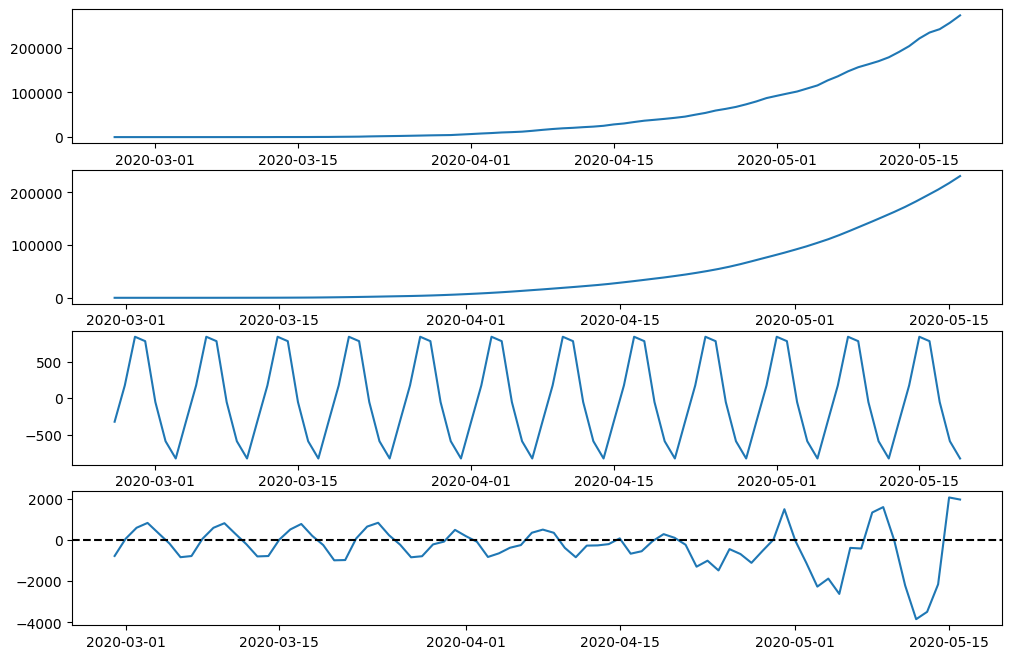

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

# ARIMA

### Modelar os dados para prever o futuro com base no passado
- pip install pmdarima

In [23]:
from pmdarima.arima import auto_arima

modelo = auto_arima(confirmados)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
fig = go.Figure(
    go.Scatter(
        x=confirmados.index,
        y=confirmados,
        name='Observados'
    )
)

fig.add_trace(
    go.Scatter(
        x=confirmados.index,
        y=modelo.predict_in_sample(),
        name='Preditos'
    )
)

fig.add_trace(
    go.Scatter(
        x=pd.date_range('2020-05-20', '2020-06-20'),
        y=modelo.predict(31),
        name='Forecast'
    )
)

fig.update_layout(title='Previsão de casos confirmados de COVID-19 no Brasil')
fig.show()